# Task 28: Evaluation Techniques for Classification Models:

The evaluation metrics for classification models provide a quantitative assessment of model performance. When we grasp the details of each metric, it becomes easier to decide which one matches the needs of our task.

Common metrics inlude,
Confusion Matrix:
- 1) Accuracy.
- 2) Confusion Matrix.
- 3) Precision.
- 4) Recall (Sensitivity).
- 5) F1 Score.
- 6) ROC Curve.
- 7) AUC (Area Under the Curve).
- 8) Cross-Validation.
- 9) Classification Report.

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load the dataset
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


### Accuracy:

This is the most simple yet intuitive way of assessing a model’s performance for classification problems. It measures the proportion of total labels that the model correctly predicted. 

Therefore, accuracy can be computed as follows:
- Accuracy = no. of correct predictions/ total no. of prediction

In [3]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.iloc[:,0:-1],data.iloc[:,-1],test_size=0.2,random_state=2)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [5]:
clf1 = LogisticRegression(max_iter=5000)
clf2 = DecisionTreeClassifier()

In [6]:
clf1.fit(X_train,y_train)
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [7]:
y_pred1 = clf1.predict(X_test)
y_pred2 = clf2.predict(X_test)

In [8]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy of Logistic Regression",accuracy_score(y_test,y_pred1))
print("Accuracy of Decision Trees",accuracy_score(y_test,y_pred2))

Accuracy of Logistic Regression 0.8852459016393442
Accuracy of Decision Trees 0.8360655737704918


**We can clearly see that *'Accuracy Score of Logistic Regression'* is greater than *'Accuracy Score of Decision Trees'*.**

Accuracy metric only tells if there is a mistake in our model or not. It does not tell the nature of mistake. This is the actual problem of this metric.
<br>
e.g
- A person diagnosed with heart disease but our model shows negative result.
- Our model predicted heart disease but in real person doesn't diagnose with heart disease.

### Confuison Matrix:

Then, Confusion Matrix comes into play. To derive the result of confusion matrix first of all we need to know about how 'Confusion Matrix' works?

**True Positives:** The model predicts a positive class label when the ground truth is also positive. This is the required behaviour as the model can successfully predict a positive label.

**False Positives:** The model predicts a positive class label when the ground truth label is negative. The model falsely identifies a data sample as positive. 

**False Negatives:** The model predicts a negative class label for a positive example. The model falsely identifies a data sample as negative.

**True Negatives:** The required behavior as well. The model correctly identifies a negative sample, predicting 0 for a data sample having a ground truth label of 0.

In [9]:
print("Logistic Regression Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))

Logistic Regression Confusion Matrix



,0,1
0,26,6
1,0,29


In [10]:
print("Decision Tree Confusion Matrix\n")
pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,2)))

Decision Tree Confusion Matrix



,0,1
0,25,7
1,1,28


In [11]:
result = pd.DataFrame()
result['Actual Label'] = y_test
result['Logistic Regression Prediction'] = y_pred1
result['Decision Tree Prediction'] = y_pred2
result.sample(10)

,Actual Label,Logistic Regression Prediction,Decision Tree Prediction
157,1,1,1
274,0,0,0
197,0,0,1
35,1,1,1
112,1,1,1
234,0,0,0
192,0,0,0
288,0,0,0
30,1,1,1
142,1,1,1


### Recall Score, Precision Score and F1 Score:

**Recall Score**, also known as Sensitivity, measures how well a model can remember the positive labels in the dataset. It measures what fraction of the positive labels in our dataset the model predicts as positive.
- Recall Score = True Positive/True Pos + False Neg

A higher recall means the model is better at remembering what data samples have positive labels.

**Precision Score** focuses on ensuring we get all positive predictions correct. It measures what fraction of the positive predictions were actually positive. 

Mathematically, it is represented as
- Precision = True positive/True Pos + False Pos

**F1 Score** is the harmonic mean of Precision and Recall. It penalizes models that have a significant imbalance between either metric.
- F1 Score = 2*(Precision * Recall/Precision + Recall)

In [12]:
from sklearn.metrics import recall_score,precision_score,f1_score

In [13]:
print("For Logistic regression Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred1),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision = ",precision_score(y_test,y_pred1))
print("Recall = ",recall_score(y_test,y_pred1))
print("F1 score =",f1_score(y_test,y_pred1))

For Logistic regression Model
--------------------------------------------------
    0   1
0  26   6
1   0  29
--------------------------------------------------
Precision =  0.8285714285714286
Recall =  1.0
F1 score = 0.90625


In [14]:
print("For Decision Tree Model")
print("-"*50)
cdf = pd.DataFrame(confusion_matrix(y_test,y_pred2),columns=list(range(0,2)))
print(cdf)
print("-"*50)
print("Precision = ",precision_score(y_test,y_pred2))
print("Recall = ",recall_score(y_test,y_pred2))
print("F1 score = ",f1_score(y_test,y_pred2))

For Decision Tree Model
--------------------------------------------------
    0   1
0  25   7
1   1  28
--------------------------------------------------
Precision =  0.8
Recall =  0.9655172413793104
F1 score =  0.8750000000000001


### AUC-ROC Score & Curve:

AUC - ROC bend is a presentation estimation for grouping issues at different limits settings.
<br>
ROC is a likelihood bend and AUC speaks to degree or proportion of distinctness. It tells how much model is fit for recognizing classes. Higher the AUC, better the model is at foreseeing 0s as 0s and 1s as 1s. By similiarity, Higher the AUC, better the model is at recognizing patients with sickness and no infection.

- **True Positive Rate(TPR)** = TP/TP+FN
<br>
- **False Positive Rate(FPR)** = FP/FP+TN

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

In [18]:
lor_auc = roc_auc_score(y_test, y_pred1)
dt_auc = roc_auc_score(y_test, y_pred2)

In [19]:
print('Logistic Regression: AUROC = ', lor_auc)
print('Decision Tree: AUROC = ', dt_auc)

Logistic Regression: AUROC =  0.90625
Decision Tree: AUROC =  0.8733836206896552


In [21]:
# plot the ROC curve
lor_fpr, lor_tpr, _ = roc_curve(y_test, y_pred1)
dt_fpr, dt_tpr, _ = roc_curve(y_test, y_pred2)

In [30]:
def plot_roc_curve(lor_fpr, lor_tpr):
    plt.plot(lor_fpr, lor_tpr, marker='.', label='Logistic Regression (AUROC = % 0.3f)' % lor_auc)
    plt.plot(dt_fpr, dt_tpr, marker='.', label='Decision Tree (AUROC = % 0.3f)' % dt_auc)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

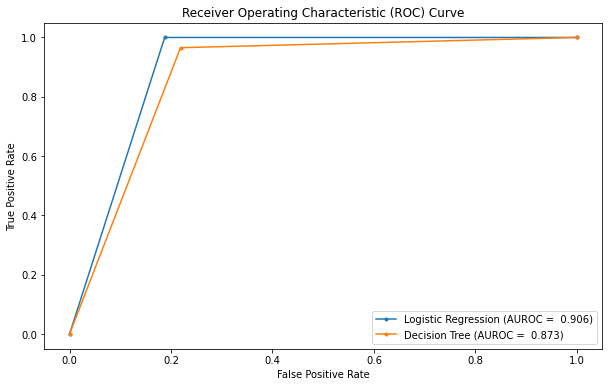

In [32]:
plt.figure(figsize=(10, 6))
plot_roc_curve(lor_fpr, lor_tpr)

### Cross-Validation:

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
score1 = cross_val_score(clf1, data.iloc[:,0:-1], data.iloc[:,-1], cv=5)
print("Cross Validation Score for Logistic Regression: ", score1)
print(f'Mean Accuracy: {score1.mean()}')

Cross Validation Score for Logistic Regression:  [0.80327869 0.86885246 0.85245902 0.86666667 0.75      ]
Mean Accuracy: 0.8282513661202187


In [32]:
score2 = cross_val_score(clf2, data.iloc[:,0:-1], data.iloc[:,-1], cv=5)
print("Cross Validation Score for Decision Tree Model: ", score2)
print(f'Mean Accuracy: {score1.mean()}')

Cross Validation Score for Decision Tree Model:  [0.73770492 0.83606557 0.72131148 0.7        0.73333333]
Mean Accuracy: 0.8281967213114754


### Classification Report:

A classification report is a collection of different evaluation metrics rather than a single one so that's where the report comes it's going to report back of a number pf different parameters evaluating our classification model.
<br>
Classification report offering a comprehensive view of the model’s performance across different classes.

In [33]:
from sklearn.metrics import classification_report

In [37]:
print('Classification Report for Logistic Regression Model:\n', classification_report(y_test, y_pred1))

Classification Report for Logistic Regression Model:
               precision    recall  f1-score   support

           0       1.00      0.81      0.90        32
           1       0.83      1.00      0.91        29

    accuracy                           0.90        61
   macro avg       0.91      0.91      0.90        61
weighted avg       0.92      0.90      0.90        61



In [39]:
print('Classification Report for Decision Tree Model:\n', classification_report(y_test, y_pred2))

Classification Report for Decision Tree Model:
               precision    recall  f1-score   support

           0       0.96      0.78      0.86        32
           1       0.80      0.97      0.88        29

    accuracy                           0.87        61
   macro avg       0.88      0.87      0.87        61
weighted avg       0.88      0.87      0.87        61



Above report shows,
- ***Accuracy*** - The accuracy of the model in decimal form. Perfect accuracy is equal to 1.0.
- ***Macro avg*** - Short for macro average, the average precision, recall and F1 score between classes. Macro avg doesn't class imbalance into effect, so if you do have class imbalances, pay attention to this metric.
- ***Weighted avg*** - Weighted average, Weighted means each metric is calculated with respect to how many samples there are in each class. This metric will favour the majority class (e.g will gave a high value when one class out performs another due to having more samples.